<a href="https://colab.research.google.com/github/RithvikRS/Malicious_URL/blob/main/ISM_Malicious_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing packages
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#importing Dataset from github
! git clone https://github.com/RithvikRS/Malicious_URL.git
data_dir = "Malicious_URL/Malicious URLs.csv"
url_df = pd.read_csv(data_dir)

Cloning into 'Malicious_URL'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
#Data
url_df.head(5)

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [ ]:
#Splitting into Train/Test data
test_percentage = .2
train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)
labels = train_df['Class']
test_labels = test_df['Class']

In [ ]:
#Counting the data for each split
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

- Counting Splits -
Training Samples: 336371
Testing Samples: 84093


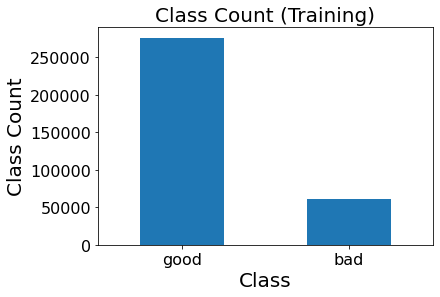

In [ ]:
# Graph counts of training set
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

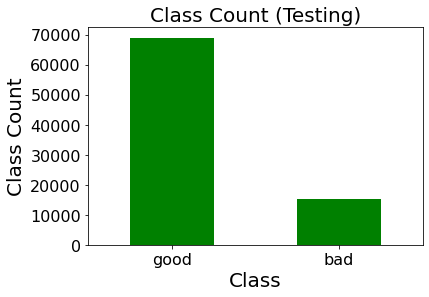

In [ ]:
# Graph counts of test set
count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)
plt.show()

In [ ]:
#Creating a function which will return features(words) from the URL
def tokenizer(url):
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
          
      tokens += dot_split
  return tokens

In [ ]:
#Verifying the function
print(tokenizer("https://en.wikipedia.org/wiki/Information_security_management"))

['https:', '', 'en.wikipedia.org', 'wiki', 'Information_security_management', 'en', 'wikipedia', 'org']


In [ ]:
#Vectorizing the training dataset

#Count Vectorizer
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

#TF-IDF
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])

In [ ]:
#Verfying the vectorizer

#CountVectorizer shape
print(count_X.shape)

#TF-IDF shape
print(tfidf_X.shape)

(336371, 575564)
(336371, 575564)


In [ ]:
#Vectorizing the testing dataset

#Count Vectorizer
test_count_X = cVec.transform(test_df['URLs'])

#TF-IDF
test_tfidf_X = tVec.transform(test_df['URLs'])

In [ ]:
#Verfying the vectorizer

#CountVectorizer shape
print(test_count_X.shape)

#TF-IDF shape
print(test_tfidf_X.shape)

(84093, 575564)
(84093, 575564)


In [ ]:
#Defining a function which creates report
def generate_report(cmatrix, score, creport):
  cmatrix = cmatrix.T
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])
  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);
  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);
  print(creport)
  plt.show()

Report
              precision    recall  f1-score   support

         bad       0.97      0.90      0.93     15136
        good       0.98      0.99      0.99     68957

    accuracy                           0.98     84093
   macro avg       0.98      0.95      0.96     84093
weighted avg       0.98      0.98      0.98     84093



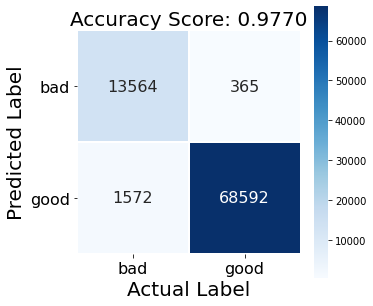

In [ ]:
#Training and evaluating Naive Bayesian model with Count Vectorizer

# Train the model
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)

print("Report")
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)

Report
              precision    recall  f1-score   support

         bad       0.99      0.82      0.90     15136
        good       0.96      1.00      0.98     68957

    accuracy                           0.97     84093
   macro avg       0.98      0.91      0.94     84093
weighted avg       0.97      0.97      0.97     84093



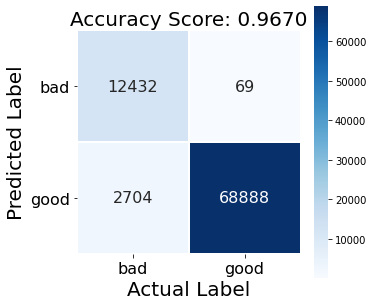

In [ ]:
#Training and evaluating Naive Bayesian model with TF-IDF

# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)

print("Report")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)


### Model Built ###

              precision    recall  f1-score   support

         bad       0.98      0.87      0.92     15136
        good       0.97      1.00      0.98     68957

    accuracy                           0.97     84093
   macro avg       0.97      0.93      0.95     84093
weighted avg       0.97      0.97      0.97     84093



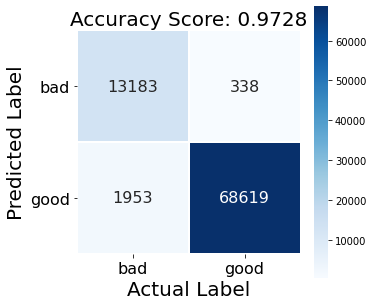

In [ ]:
# Logistic Regression with Count Vectorizer

# Train the model
lgs_count = LogisticRegression(solver='lbfgs',max_iter=1000)
lgs_count.fit(count_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_count = lgs_count.score(test_count_X, test_labels)
predictions_lgs_count = lgs_count.predict(test_count_X)
cmatrix_lgs_count = confusion_matrix(test_labels, predictions_lgs_count)
creport_lgs_count = classification_report(test_labels, predictions_lgs_count)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_count, score_lgs_count, creport_lgs_count)


### Model Built ###

              precision    recall  f1-score   support

         bad       0.96      0.83      0.89     15136
        good       0.96      0.99      0.98     68957

    accuracy                           0.96     84093
   macro avg       0.96      0.91      0.93     84093
weighted avg       0.96      0.96      0.96     84093



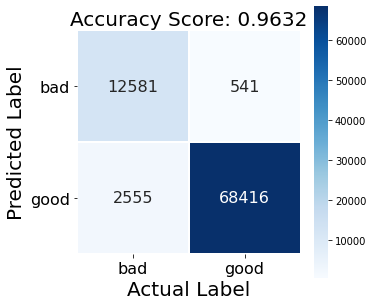

In [ ]:
# Logistic Regression with TF-IDF

# Train the model
lgs_tfidf = LogisticRegression(solver='lbfgs',max_iter=1000)
lgs_tfidf.fit(tfidf_X, labels)


# Test the mode (score, predictions, confusion matrix, classification report)
score_lgs_tfidf = lgs_tfidf.score(test_tfidf_X, test_labels)
predictions_lgs_tfidf = lgs_tfidf.predict(test_tfidf_X)
cmatrix_lgs_tfidf = confusion_matrix(test_labels, predictions_lgs_tfidf)
creport_lgs_tfidf = classification_report(test_labels, predictions_lgs_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_lgs_tfidf, score_lgs_tfidf, creport_lgs_tfidf)

In [ ]:
#Testing with users input
user_test=input("Enter URL: ")
user_test=pd.DataFrame([user_test])
user_count_x=count_X = cVec.transform(user_test[0])
user_tfidf_X = tVec.transform(user_test[0])
print("Prediction by using Multinomial Naive Byes model(Count Vectorizer)")
result = mnb_count.predict(user_count_x)
print(result)
print("Prediction by using Multinomial Naive Bayes model(TF-IDF)")
result2 = mnb_tfidf.predict(user_tfidf_X)
print(result)
print("Prediction by using Logistic Regression model(Count Vectorizer)")
result = lgs_count.predict(user_count_x)
print(result)
print("Prediction by using Logistic Regression model(TF-IDF)")
result2 = lgs_tfidf.predict(user_tfidf_X)
print(result)

Enter URL: https://stock888.cn
Prediction by using Multinomial Naive Byes model(Count Vectorizer)
['bad']
Prediction by using Multinomial Naive Bayes model(TF-IDF)
['bad']
Prediction by using Logistic Regression model(Count Vectorizer)
['bad']
Prediction by using Logistic Regression model(TF-IDF)
['bad']
